## Input Images qmax in row, col reconstruction

In [129]:
import uproot
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import os

* Dataframe definition:

In [130]:
class ND280_dataset:
    def __init__(self, path):
        #tree_hattracks = uproot.open(path)['hatdigits']
        tree_hattracks = uproot.open(path)['hatdigits']
        
        df = tree_hattracks.arrays()
        tree = ak.to_dataframe(df)
        keys = tree.index.get_level_values('entry').unique()
        
        self.tree = tree
        self.keys = keys
        
    def __getitem__(self, i):
        key = self.keys[i]
        return self.tree.loc[key]
    
    def __len__(self):
        return len(self.keys)

Select desired path (you can select the desired path by changing the #):

- 1 track events:

In [153]:
#path="/nfs/pic.es/user/m/mrodrigu/Generate Images/1track.root"
#Title='1 Track'

- 2 tracks, 1 vertex events:

In [147]:
#path= "/nfs/pic.es/user/m/mrodrigu/Generate Images/1vertex.root"
#Title='2 Tracks, 1 Vertex'

- 2 tracks, 2 vertex events:

In [159]:
#path= "/nfs/pic.es/user/m/mrodrigu/Generate Images/2vertex_corr.root"
#Title='2 Tracks, 2 Vertex'

- 2 tracks, 2 vertex events (variable direction for the tracks):

In [166]:
path= "/nfs/pic.es/user/m/mrodrigu/Generate Images/2vertex_corr_ang.root"
Title='2 Tracks, 2 Vertex, with variable direction'

Definition:

In [167]:
ds = ND280_dataset(path)

In [168]:
df = pd.DataFrame(ds.tree)

In [169]:
df_unique_entries = df.groupby('entry').first()

In [170]:
print(f'nº events= {len(df_unique_entries.groupby("event"))}')

nº events= 5


In [171]:
print(f'nº entries= {len(df_unique_entries)}')

nº entries= 1543


In [172]:
df_unique_entries

,event,hat,plate,fem,fec,asic,channel,time,nsamples,adc,row,col,y,z,qmax,tmax,fwhm
entry,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,4,5,302,26,272,27,15,1083.685059,-2182.635986,288,312,13
1,0,0,0,1,0,4,6,239,54,246,27,14,1083.685059,-2193.916016,900,257,16
2,0,0,0,1,0,4,7,239,55,251,27,13,1083.685059,-2205.196045,985,258,16
3,0,0,0,1,0,4,8,275,82,274,27,12,1083.685059,-2216.476074,294,296,51
4,0,0,0,1,0,4,16,240,57,239,26,14,1073.494995,-2193.916016,479,257,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,4,0,0,5,0,3,60,390,26,256,2,0,487.934998,-2351.835938,287,400,1
1539,4,0,0,5,0,3,61,269,91,250,2,1,487.934998,-2340.555908,532,285,15
1540,4,0,0,5,0,3,62,329,50,273,2,2,487.934998,-2329.275879,291,339,26


**2D maps:**

* Qmax in row,col (compiled matrix): 

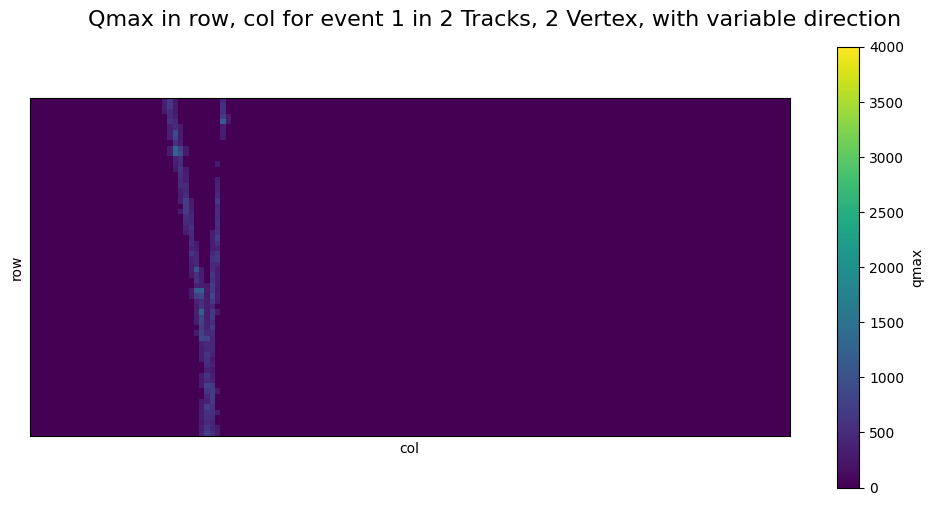

In [173]:
event_value=1
df_sel = df_unique_entries[df_unique_entries['event']== event_value]

global_qmax_max = 4000
global_qmax_min = 0

for fem_value in range(8):
    df_sel_fem = df_sel[df_sel['fem'] == fem_value]
    num_inputs = len(df_sel_fem)

    if num_inputs != 0:
        matrix_name = f"matrix_{fem_value}"  
        globals()[matrix_name] = np.zeros((32, 36))  
        globals()[matrix_name][df_sel_fem['row'], df_sel_fem['col']] = df_sel_fem['qmax']

    else:
        matrix_name = f"matrix_{fem_value}"
        globals()[matrix_name] = np.full((32, 36), global_qmax_min) 

matrix_up= np.hstack((matrix_0, matrix_1, matrix_2, matrix_3))
matrix_down= np.hstack((matrix_4, matrix_5, matrix_6, matrix_7))
complete_matrix= np.vstack((matrix_down, matrix_up))

plt.figure(figsize=(10, 8))
ax = plt.gca()

im = ax.imshow(complete_matrix, cmap='viridis', origin='lower', vmin=global_qmax_min, vmax=global_qmax_max)

plt.colorbar(im, ax=ax, label='qmax',shrink=0.6)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel('col')
ax.set_ylabel('row')


plt.suptitle(f'Qmax in row, col for event {event_value} in {Title}', fontsize=16, y=0.8)

plt.tight_layout()

plt.savefig('normal', dpi=200)

Code that generates a folder with images of all events:

In [174]:
output_folder = f'Qmax in row col {Title}'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

global_qmax_min=0
global_qmax_max=4000
    
for event_value in range(len(df_unique_entries.groupby("event"))):  
    df_sel = df_unique_entries[df_unique_entries['event']== event_value]
    for fem_value in range(8):
        df_sel_fem = df_sel[df_sel['fem'] == fem_value]
        num_inputs = len(df_sel_fem)

        if num_inputs != 0:
            matrix_name = f"matrix_{fem_value}"  
            globals()[matrix_name] = np.zeros((32, 36))  
            globals()[matrix_name][df_sel_fem['row'], df_sel_fem['col']] = df_sel_fem['qmax']

        else:
            matrix_name = f"matrix_{fem_value}"
            globals()[matrix_name] = np.full((32, 36), global_qmax_min)  

    matrix_up= np.hstack((matrix_0, matrix_1, matrix_2, matrix_3))
    matrix_down= np.hstack((matrix_4, matrix_5, matrix_6, matrix_7))
    complete_matrix= np.vstack((matrix_down, matrix_up))

    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    im = ax.imshow(complete_matrix, cmap='viridis', origin='lower', vmin=global_qmax_min, vmax=global_qmax_max)

    plt.colorbar(im, ax=ax, shrink=0.6, )

    ax.set_xlabel('col')
    ax.set_ylabel('row')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.suptitle(f'Qmax in row, col for event {event_value} in {Title}', fontsize=16, y=0.8)

    plt.tight_layout()
        
    output_file = f'{output_folder}/fem_qmax_row_col_{event_value}_{Title}'
    plt.savefig(output_file, dpi=200, bbox_inches='tight')
    plt.clf()

print('All done!')

All done!


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

* Qmax in row,col (compiled matrix with SPACE):    
There is a small spatial separation between the Fems, so in this representation a column and row of 0's are added between Fems for a more correct description.

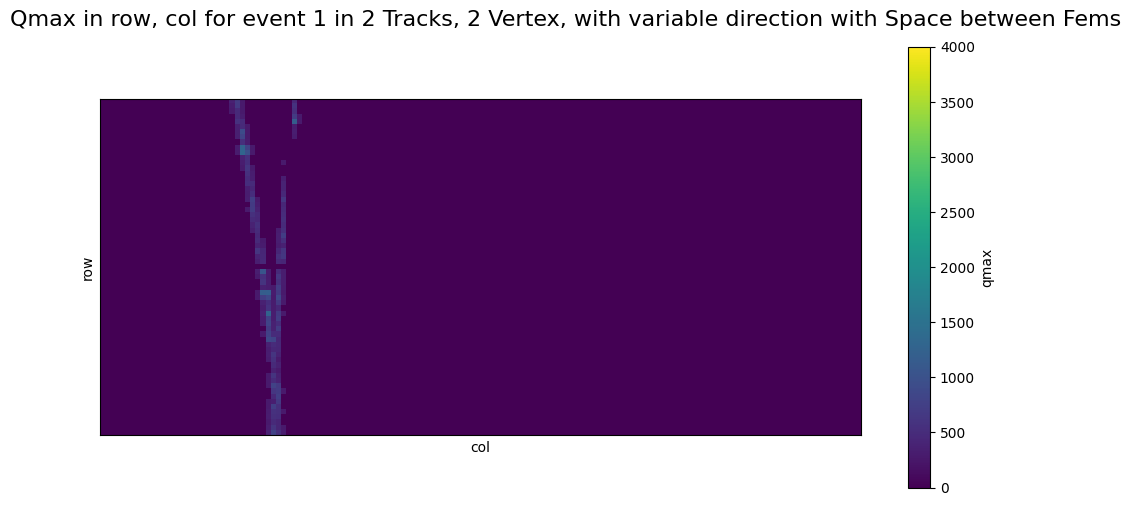

In [175]:
event_value=1
df_sel = df_unique_entries[df_unique_entries['event']== event_value]

global_qmax_max = 4000
global_qmax_min = 0

for fem_value in range(8):
    df_sel_fem = df_sel[df_sel['fem'] == fem_value]
    num_inputs = len(df_sel_fem)

    if num_inputs != 0:
        matrix_name = f"matrix_{fem_value}"  
        globals()[matrix_name] = np.zeros((32, 36))  
        globals()[matrix_name][df_sel_fem['row'], df_sel_fem['col']] = df_sel_fem['qmax']

    else:
        matrix_name = f"matrix_{fem_value}"
        globals()[matrix_name] = np.full((32, 36), global_qmax_min)  

zero_matrix_col=np.zeros((32, 1))
zero_matrix_row=np.zeros((1, 147))
matrix_up= np.hstack((matrix_0, zero_matrix_col, matrix_1, zero_matrix_col, matrix_2, zero_matrix_col, matrix_3))
matrix_down= np.hstack((matrix_4, zero_matrix_col, matrix_5, zero_matrix_col, matrix_6, zero_matrix_col, matrix_7))
complete_matrix= np.vstack((matrix_down, zero_matrix_row, matrix_up))


plt.figure(figsize=(10, 8))
ax = plt.gca()

im = ax.imshow(complete_matrix, cmap='viridis', origin='lower', vmin=global_qmax_min, vmax=global_qmax_max)

plt.colorbar(im, ax=ax, label='qmax',shrink=0.6)

ax.set_xlabel('col')
ax.set_ylabel('row')

ax.set_xticks([])
ax.set_yticks([])
plt.suptitle(f'Qmax in row, col for event {event_value} in {Title} with Space between Fems', fontsize=16, y=0.8)

plt.tight_layout()

plt.savefig('space', dpi=200)